In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models_extended import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = True

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn_permute_val/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp_permute_val/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn_permute_val2/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp_permute_val2/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[256]]
linear_sizes_list = [[]]
gcn_layers_list = [4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

permute_layer_list = [[], [0,1,2,3]]
pre_act_permute_gcn_list = [True]
post_act_permute_gcn_list = [True]

#permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn


In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list


#permute
param_combinations["permute_layer_list"] = permute_layer_list
param_combinations["pre_act_permute_gcn_list"] = pre_act_permute_gcn_list
param_combinations["post_act_permute_gcn_list"] = post_act_permute_gcn_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

6


In [13]:
#permute_index=[], pre_act_permute_gcn=False, post_act_permute_gcn=False

In [14]:
apply_scaffold_split = apply_scaffold_split


if create_new_data:
    data, data_y = load_esol()

    pytorch_graph_list = create_pytorch_graph(data)

    processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

    train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
    loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

else:

    import dill as pickle

    if apply_scaffold_split:
        loader_file = 'datasets_scaffold_reg_esol.pkl'
    else: 
        loader_file = 'datasets_reg_esol.pkl'
    with open(loader_file, 'rb') as file: 
        
        
        loaders = pickle.load(file) 
    
        print(loaders) 

    train_dataset, test_dataset, val_dataset = loaders

    '''
    if use_fingerprints:
        morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

        loader = DataLoader(morgan_data_train, 
                            batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(morgan_data_test, 
                                batch_size=batch_size, shuffle=True)

    else:
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
    '''
    loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


run: 0
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000240DFC3AC10>, <function global_max_pool at 0x00000240DFC355E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.862246322631836 | Validation Loss 4.236438989639282
Epoch 10 | Train Loss 3.2388314247131347 | Validation Loss 2.7778146266937256
Epoch 20 | Train Loss 2.162453603744507 | Validation Loss 1.7722389101982117
Epoch 30 | Train Loss 1.5899750471115113 | Validation Loss 1.67185640335083
Epoch 40 | Train Loss 1.3571921825408935 | Validation Loss 1.3988808393478394
Epoch 50 | Train Loss 1.3615927894910176 | Validation Loss 1.731222152709961
Epoch 60 | Train Loss 1.3761174400647482 | Validation Loss 1.271222174167633
Epoch 70 | Train Loss 1.419445244471232 | Validation Loss 1.3776289224624634
Epoch 80 | Train Loss 1.0704112927118936 | Validation Loss 1.2394739389419556
Epoch 90 | Train Loss 1.4495866696039836 | Validation Loss 2.0992161631584167
Epoch 100 | Train Loss 0.8500460843245189 | Validation Loss 1.0789673328399658
Epoch 110 | Train Loss 0.7686481793721517 | Validation Loss 1.1408939361572266
Epoch 120 | Train Loss 0.7183064460754395 | Validation Loss 0.995411545

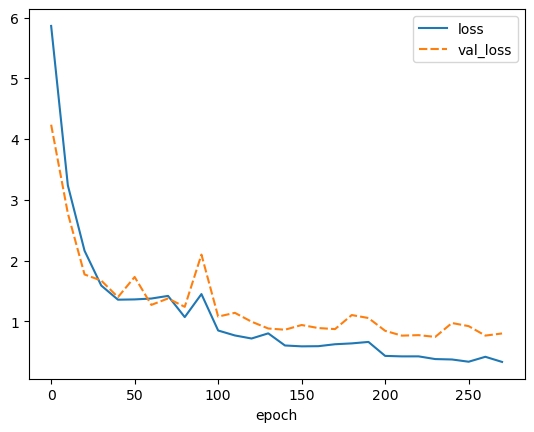

best weights loaded


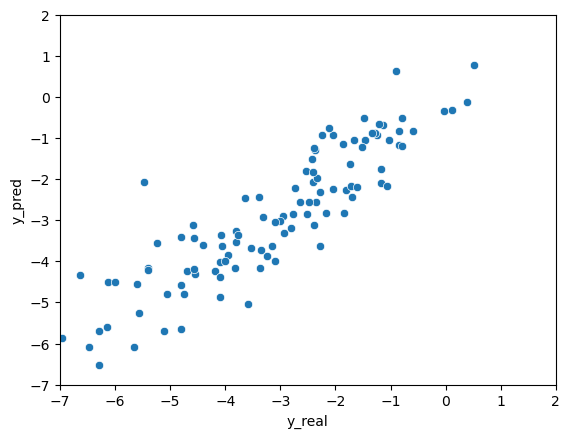

elapsed time: 66.43854999542236
run: 7
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000240DFC3AC10>, <function global_max_pool at 0x00000240DFC355E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.772447888056437 | Validation Loss 6.572941303253174
Epoch 10 | Train Loss 4.503901831309 | Validation Loss 4.6556748151779175
Epoch 20 | Train Loss 4.8793800354003904 | Validation Loss 4.179954290390015
Epoch 30 | Train Loss 4.319313065210978 | Validation Loss 4.202511310577393
Epoch 40 | Train Loss 4.146145566304525 | Validation Loss 4.349441051483154
Epoch 50 | Train Loss 4.099605401357015 | Validation Loss 4.581804990768433
Epoch 60 | Train Loss 3.7353469371795653 | Validation Loss 4.3572328090667725
Epoch 70 | Train Loss 4.181638526916504 | Validation Loss 3.487709164619446
Epoch 80 | Train Loss 3.5896018028259276 | Validation Loss 3.2702126502990723
Epoch 90 | Train Loss 3.4936545848846436 | Validation Loss 3.315321683883667
Epoch 100 | Train Loss 3.3238519032796225 | Validation Loss 3.456194758415222
Epoch 110 | Train Loss 3.245311800638835 | Validation Loss 3.183537483215332
Epoch 120 | Train Loss 3.0383973757425946 | Validation Loss 3.6021127700805664
Ep

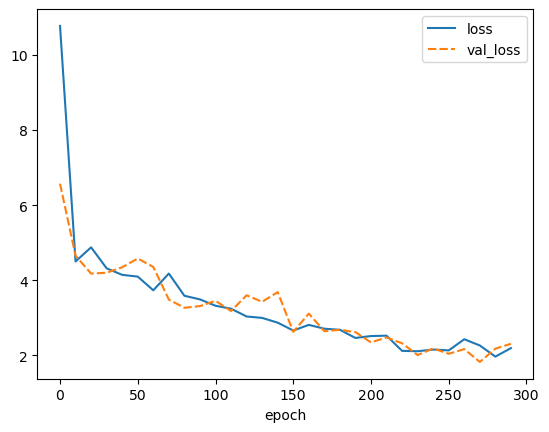

best weights loaded


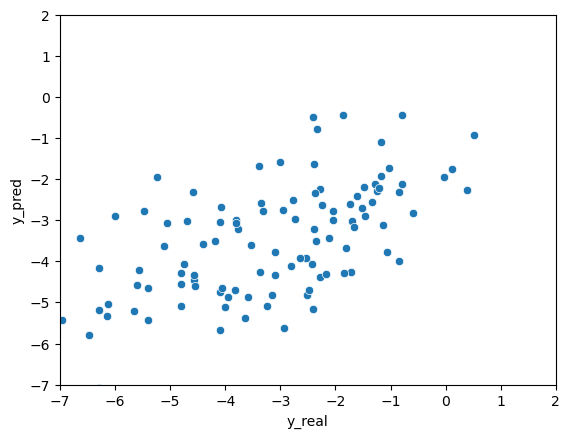

elapsed time: 100.54587626457214
run: 8
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000240DFC3AC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 6.458108059565226 | Validation Loss 5.077029228210449
Epoch 10 | Train Loss 3.634686326980591 | Validation Loss 4.330436944961548
Epoch 20 | Train Loss 3.3353569567203523 | Validation Loss 4.933588743209839
Epoch 30 | Train Loss 2.2408377091089884 | Validation Loss 2.2486326694488525
Epoch 40 | Train Loss 1.6703015327453614 | Validation Loss 1.550492763519287
Epoch 5

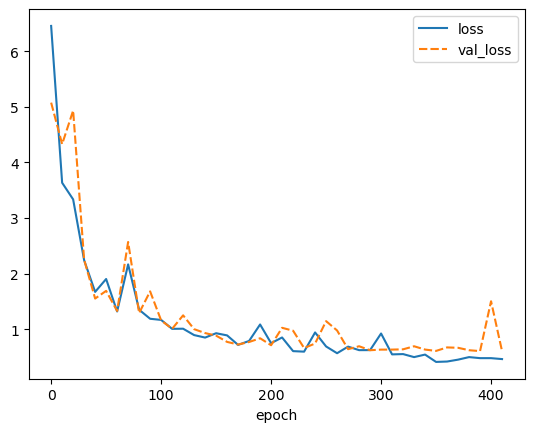

best weights loaded


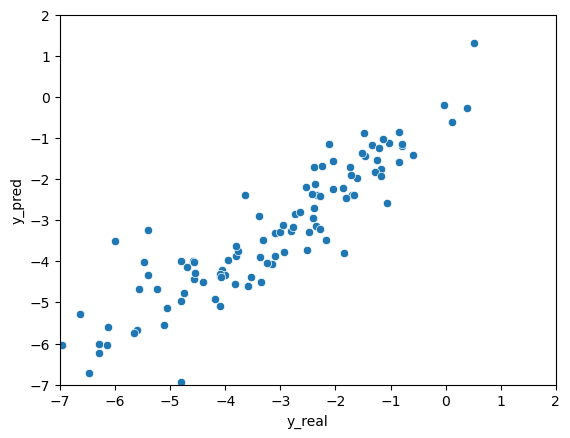

elapsed time: 84.97844004631042
run: 9
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x00000240DFC3AC10>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193
Epoch 0 | Train Loss 13.443866411844889 | Validation Loss 12.478965282440186
Epoch 10 | Train Loss 4.854470062255859 | Validation Loss 4.417142033576965
Epoch 20 | Train Loss 4.660662237803141 | Validation Loss 4.698279023170471
Epoch 30 | Train Loss 4.097704108556112 | Validation Loss 4.238732576370239
Epoch 40 | Train Loss 4.522101306915284 | Validation Loss 3.63321852684021
E

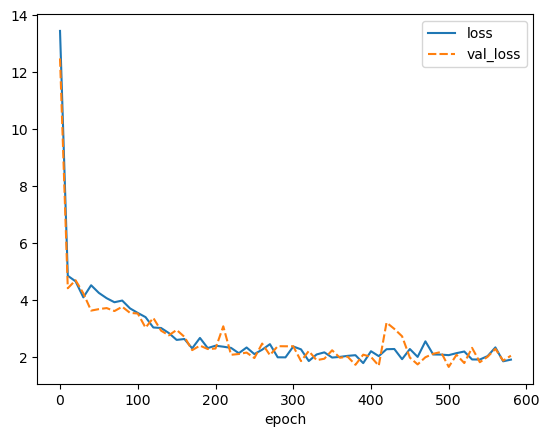

best weights loaded


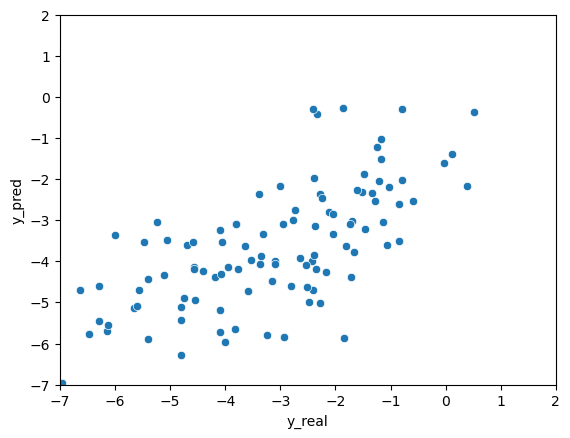

elapsed time: 183.85829257965088
run: 10
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000240DFC355E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.633682791392008 | Validation Loss 4.730123519897461
Epoch 10 | Train Loss 2.957147145271301 | Validation Loss 2.6623488664627075
Epoch 20 | Train Loss 2.0890046119689942 | Validation Loss 2.0442046523094177
Epoch 30 | Train Loss 1.576386284828186 | Validation Loss 2.2539966106414795
Epoch 40 | Train Loss 1.4887601534525554 | Validation Loss 1.3688948154449463
Epoch 50 | Train Loss 1.2607470472653708 | Validation Loss 1.132086992263794
Epoch 60 | Train Loss 1.2471530874570211 | Validation Loss 1.0556977987289429
Epoch 70 | Train Loss 1.065546727180481 | Validation Loss 1.1099071502685547
Epoch 80 | Train Loss 0.9509794433911641 | Validation Loss 1.1473658680915833
Epoch 90 | Train Loss 0.8756164948145548 | Validation Loss 1.2745315432548523
Epoch 100 | Train Loss 1.3518704811731974 | Validation Loss 1.151850014925003
Epoch 110 | Train Loss 0.7716877261797587 | Validation Loss 0.9100998640060425
Epoch 120 | Train Loss 0.6961926261583964 | Validation Loss 0.81961050

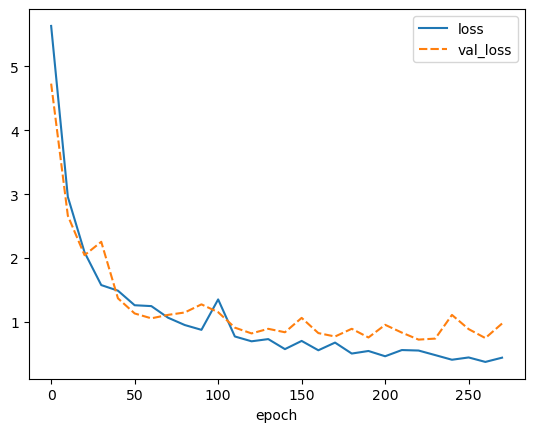

best weights loaded


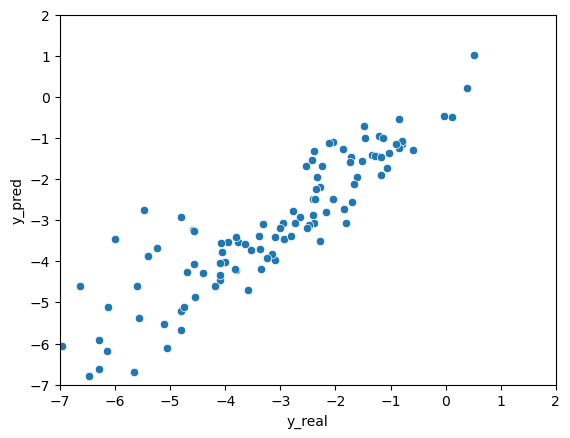

elapsed time: 53.634697675704956
run: 11
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x00000240DFC355E0>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0, 1, 2, 3], 'pre_act_permute_gcn_list': True, 'post_act_permute_gcn_list': True}
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 13.220391654968262 | Validation Loss 12.08469295501709
Epoch 10 | Train Loss 4.943432950973511 | Validation Loss 4.298095464706421
Epoch 20 | Train Loss 4.33448117574056 | Validation Loss 3.8198589086532593
Epoch 30 | Train Loss 4.083216142654419 | Validation Loss 4.263509392738342
Epoch 40 | Train Loss 4.221425835291544 | Validation Loss 4.040746808052063
Epoch 50 | Train Loss 4.080908711751302 | Validation Loss 4.01784884929657
Epoch 60 | Train Loss 3.5865019798278808 | Validation Loss 3.5327250957489014
Epoch 70 | Train Loss 3.6370309670766194 | Validation Loss 4.12885308265686
Epoch 80 | Train Loss 3.265022055308024 | Validation Loss 3.3374485969543457
Epoch 90 | Train Loss 3.334241278966268 | Validation Loss 3.1948161125183105
Epoch 100 | Train Loss 3.1914699554443358 | Validation Loss 3.4114514589309692
Epoch 110 | Train Loss 2.8388223171234133 | Validation Loss 2.919448137283325
Epoch 120 | Train Loss 3.0367401281992596 | Validation Loss 3.0295143127441406
E

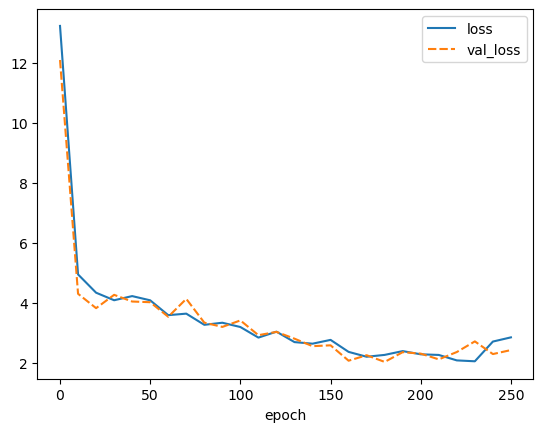

best weights loaded


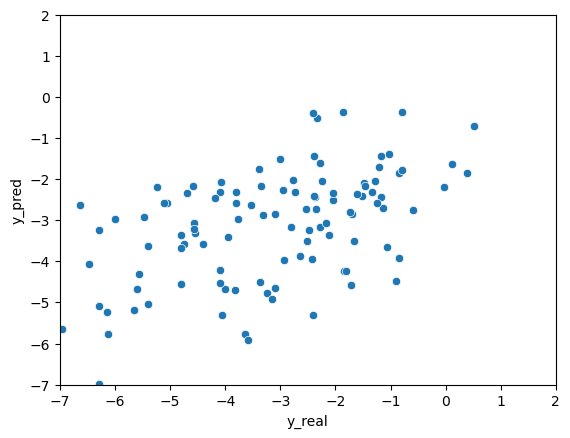

elapsed time: 83.19351363182068


In [15]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])

        permute_index=combination_dict["permute_layer_list"]
        pre_act_permute_gcn=combination_dict["pre_act_permute_gcn_list"]
        post_act_permute_gcn=combination_dict["post_act_permute_gcn_list"]
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 




        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate, permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names

        save_dict["permute_index"] = permute_index
        save_dict["pre_act_permute_gcn"] = pre_act_permute_gcn
        save_dict["post_act_permute_gcn"] = post_act_permute_gcn


    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp



    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    